In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/Users/jiaqiliu/opt/anaconda3/a_fall2021/diabetic_data.csv', delimiter = ',')

In [3]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
df = df.set_index('encounter_id')
# setting encounter_id as index

In [5]:
df = df.iloc[:, 1:]
# getting rid of patient_nbr from data

In [6]:
for col in df:
    print(col, df[col].unique())

race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id [6 1 2 3 4 5 8 7]
discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-N

In [7]:
import matplotlib.pyplot as plt

<ipython-input-9-8ae6ed409aa1>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


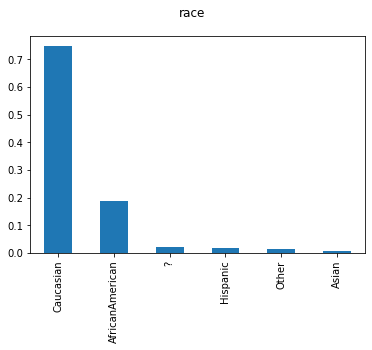

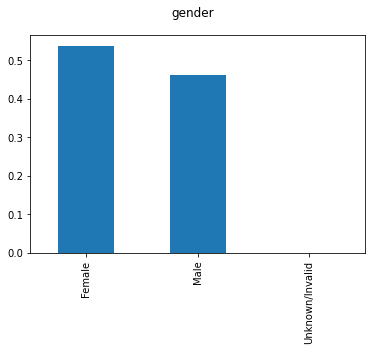

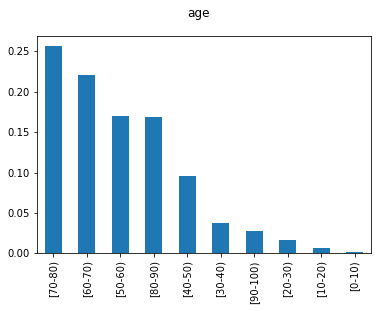

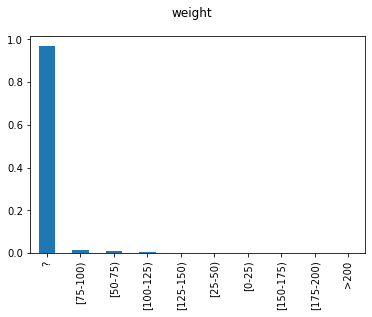

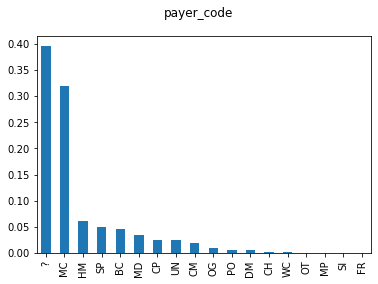

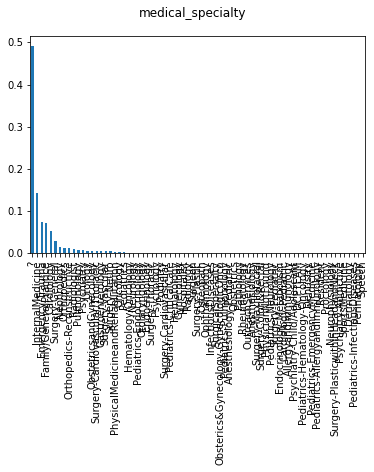

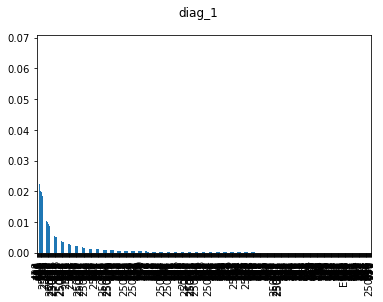

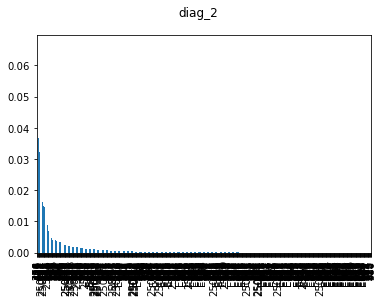

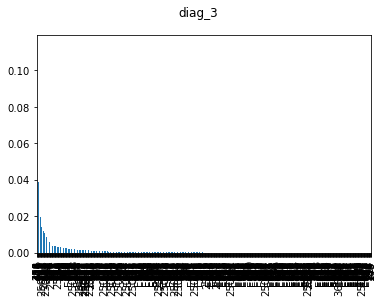

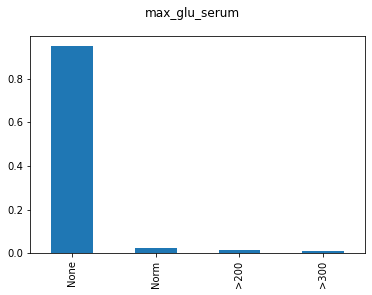

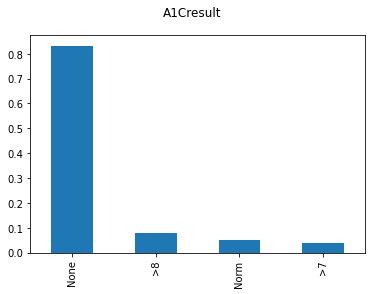

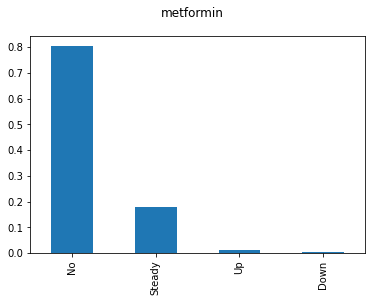

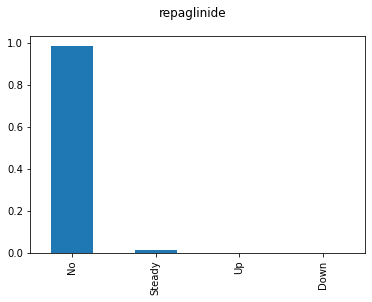

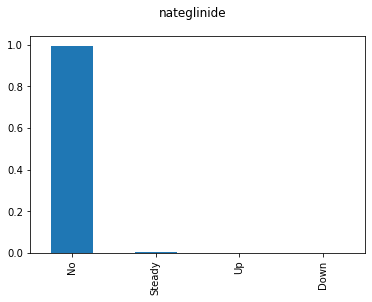

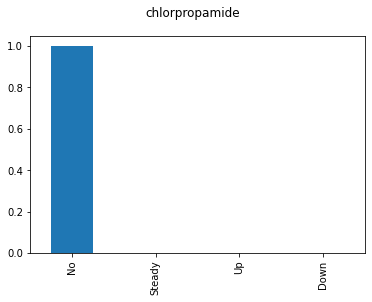

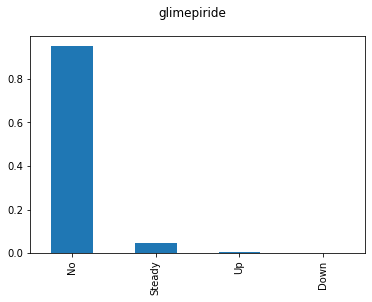

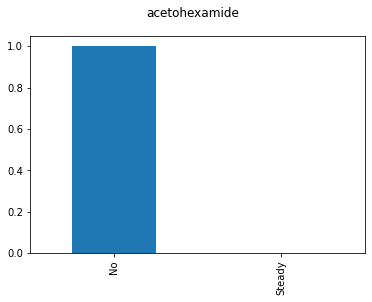

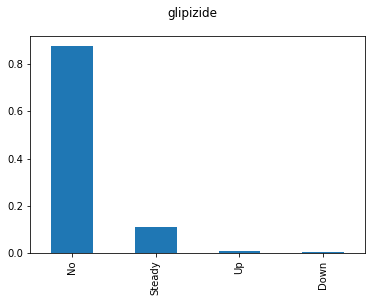

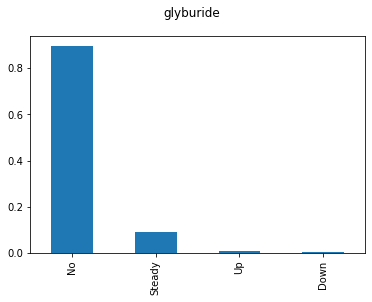

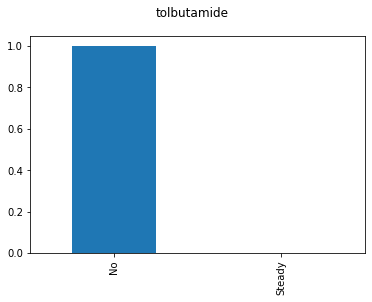

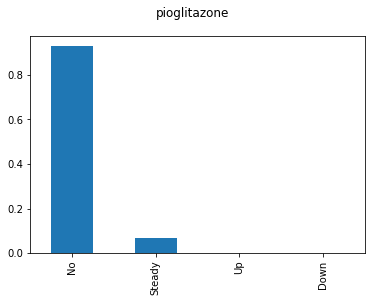

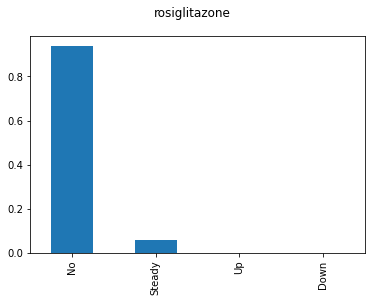

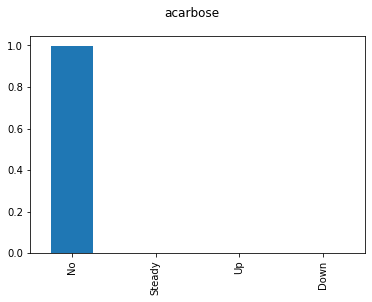

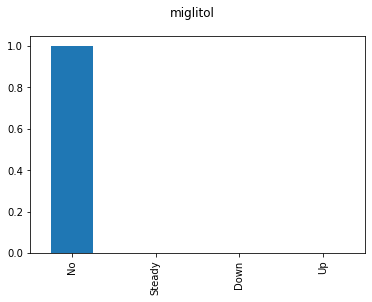

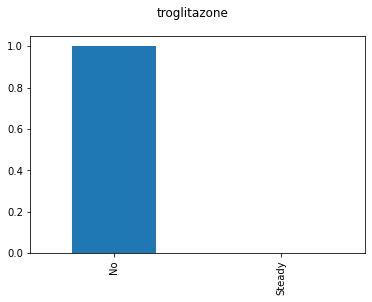

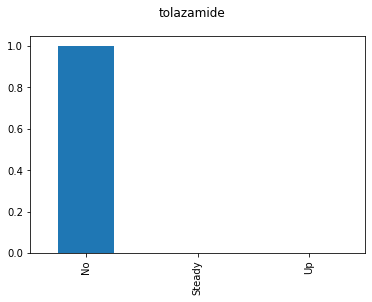

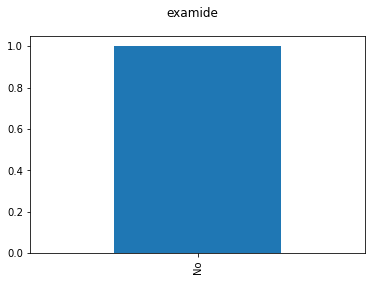

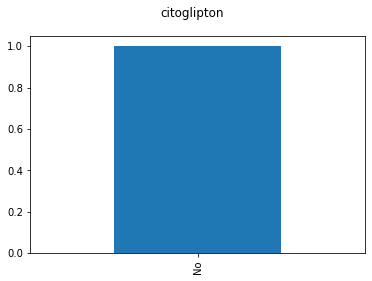

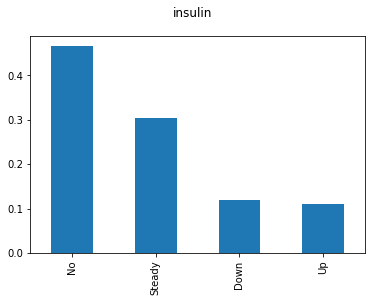

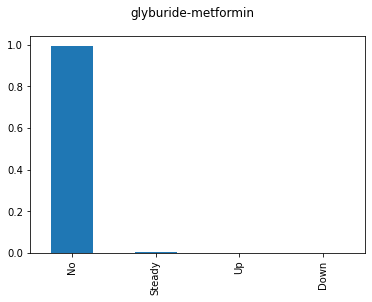

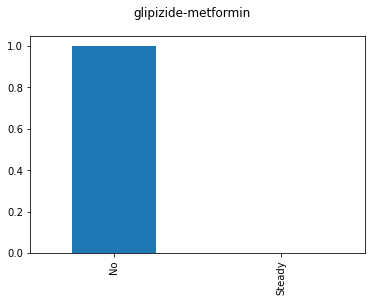

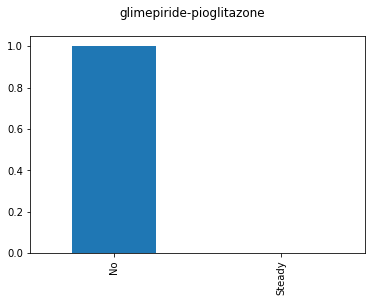

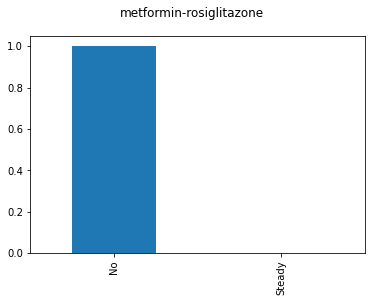

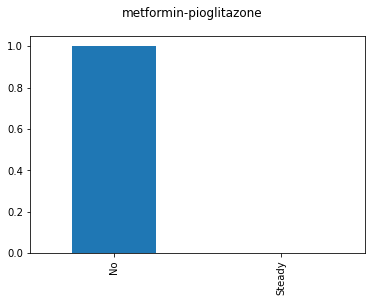

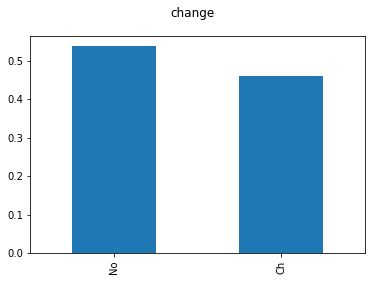

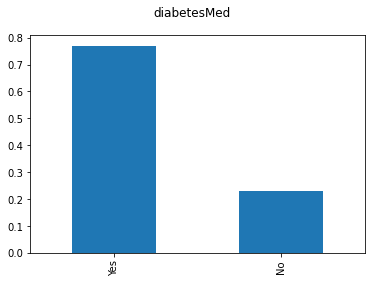

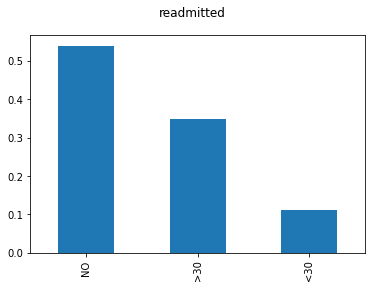

In [9]:
# visualising string columns
for x in df.columns[df.dtypes == object]:
   fig = plt.figure()
   df[x].value_counts(normalize=True).plot(kind='bar')
   fig.suptitle(x)

# notes: going to treat missing values (?) as its own category, i.e. will not impute missing values
# will throw out the following columns:
# weight (mostly ?)
# payer_code, medical_specialty, diag_1, diag_2, diag_3 (not practical to use)
# examide, citoglipton (only 1 value)

In [10]:
df = df.drop(columns = ['weight', 'diag_1', 'diag_2', 'diag_3', 'payer_code', 'medical_specialty', 'examide', 'citoglipton'])

<AxesSubplot:>

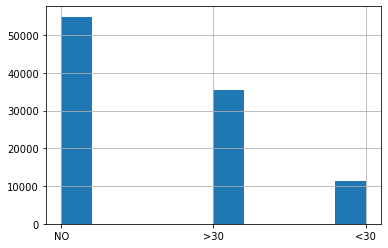

In [19]:
df['readmitted'].hist()
# not that unbalanced

In [11]:
# transforming categorical variables to numerical
replace_map = {'readmitted': {'Yes': 1, 'NO': 0, 'Ch': 1, 'Steady': 1, '<30': 1, '>30': 2},
              'diabetesMed': {'Yes': 1, 'No': 0, 'Ch': 1, 'Steady': 1, '<30': 1, '>30': 2},
              'change': {'Yes': 1, 'No': 0, 'Ch': 1, 'Steady': 1, '<30': 1, '>30': 2},
              'metformin-pioglitazone': {'Yes': 1, 'No': 0, 'Ch': 1, 'Steady': 1, '<30': 1, '>30': 2},
              'metformin-rosiglitazone': {'Yes': 1, 'No': 0, 'Ch': 1, 'Steady': 1, '<30': 1, '>30': 2},
              'glimepiride-pioglitazone': {'Yes': 1, 'No': 0, 'Ch': 1, 'Steady': 1, '<30': 1, '>30': 2},
              'glipizide-metformin': {'Yes': 1, 'No': 0, 'Ch': 1, 'Steady': 1, '<30': 1, '>30': 2},
              'troglitazone': {'Yes': 1, 'No': 0, 'Ch': 1, 'Steady': 1, '<30': 1, '>30': 2},
              'tolbutamide': {'Yes': 1, 'No': 0, 'Ch': 1, 'Steady': 1, '<30': 1, '>30': 2},
              'acetohexamide': {'Yes': 1, 'No': 0, 'Ch': 1, 'Steady': 1, '<30': 1, '>30': 2}
              }

In [12]:
df_replace=df.copy()
df_replace.replace(replace_map, inplace=True)

In [13]:
print(df_replace.head())

                         race  gender      age  admission_type_id  \
encounter_id                                                        
2278392             Caucasian  Female   [0-10)                  6   
149190              Caucasian  Female  [10-20)                  1   
64410         AfricanAmerican  Female  [20-30)                  1   
500364              Caucasian    Male  [30-40)                  1   
16680               Caucasian    Male  [40-50)                  1   

              discharge_disposition_id  admission_source_id  time_in_hospital  \
encounter_id                                                                    
2278392                             25                    1                 1   
149190                               1                    7                 3   
64410                                1                    7                 2   
500364                               1                    7                 2   
16680                         

In [14]:
df_onehot = df_replace.copy()
df_final = pd.get_dummies(df_onehot, columns=['max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','glipizide','glyburide','pioglitazone','rosiglitazone','acarbose','miglitol','race', 'gender', 'age', 'tolazamide', 'insulin', 'glyburide-metformin'], prefix = ['max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','glipizide','glyburide','pioglitazone','rosiglitazone','acarbose','miglitol','race', 'gender', 'age', 'tolazamide', 'insulin', 'glyburide-metformin'])

In [57]:
print(df_final.head())

              admission_type_id  discharge_disposition_id  \
encounter_id                                                
2278392                       6                        25   
149190                        1                         1   
64410                         1                         1   
500364                        1                         1   
16680                         1                         1   

              admission_source_id  time_in_hospital  num_lab_procedures  \
encounter_id                                                              
2278392                         1                 1                  41   
149190                          7                 3                  59   
64410                           7                 2                  11   
500364                          7                 2                  44   
16680                           7                 1                  51   

              num_procedures  num_medications 

In [15]:
for x in df_final.columns[df_final.dtypes == object]:
    print(x)
# no output means no categorical variables; all transformed to numeric

In [59]:
print(df_final.isnull().sum())

admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
num_lab_procedures            0
                             ..
insulin_Up                    0
glyburide-metformin_Down      0
glyburide-metformin_No        0
glyburide-metformin_Steady    0
glyburide-metformin_Up        0
Length: 103, dtype: int64


In [60]:
print(df_final.isnull().values.sum())

0


# below is performing feature selection using decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_final.iloc[:, df_final.columns != 'readmitted'], df_final['readmitted'], test_size=0.2)

In [65]:
X_train.shape

(81412, 102)

In [68]:
y_train.head()

encounter_id
221470950    2
147734622    2
178537674    0
223041030    0
275429940    2
Name: readmitted, dtype: int64

In [73]:
clf = DecisionTreeClassifier(max_depth = 3)

In [74]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(167.4, 190.26, 'X[9] <= 0.5\ngini = 0.575\nsamples = 81412\nvalue = [43884, 9076, 28452]'),
 Text(83.7, 135.9, 'X[10] <= 5.5\ngini = 0.524\nsamples = 54112\nvalue = [33275, 4556, 16281]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 6.5\ngini = 0.449\nsamples = 12872\nvalue = [9030, 847, 2995]'),
 Text(20.925, 27.180000000000007, 'gini = 0.412\nsamples = 6704\nvalue = [4950, 443, 1311]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.484\nsamples = 6168\nvalue = [4080, 404, 1684]'),
 Text(125.55000000000001, 81.53999999999999, 'X[8] <= 0.5\ngini = 0.542\nsamples = 41240\nvalue = [24245, 3709, 13286]'),
 Text(104.625, 27.180000000000007, 'gini = 0.536\nsamples = 38111\nvalue = [22833, 3373, 11905]'),
 Text(146.475, 27.180000000000007, 'gini = 0.59\nsamples = 3129\nvalue = [1412, 336, 1381]'),
 Text(251.10000000000002, 135.9, 'X[9] <= 1.5\ngini = 0.623\nsamples = 27300\nvalue = [10609, 4520, 12171]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 7.5\ngini = 0.602\nsamples = 156

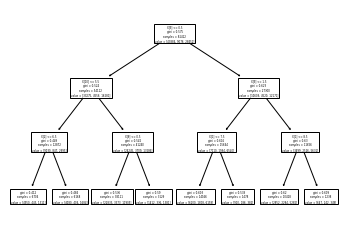

In [75]:
tree.plot_tree(clf)

In [86]:
X_train.iloc[:, 10].head()
# features are columns 1,2,8,9,10
#['discharge_disposition_id', 'admission_source_id', 'number_emergency', 'number_inpatient', 'number_diagnoses']

encounter_id
221470950    8
147734622    5
178537674    8
223041030    9
275429940    5
Name: number_diagnoses, dtype: int64

In [16]:
a2 = df_final[['discharge_disposition_id', 'admission_source_id', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']]

In [17]:
a2.shape

(101766, 6)

Summary statistics and visualization for all the variables (visualization should be meaningful)
-- skipped because most columns are categorical so not sure what summary statistics would be meaningful


Through analysis of missing values and choosing a proper missing value imputation (make sure you have reason to choose method A over B for the imputation)
-- will be treating missing values as its own category; no imputation needed


Run at least 3 feature selection methods to find the best features (create data frame A2 to A4)
-- A2 is created using decision tree

Check the distribution of your variables to see if you need any feature transformation
Check the data imbalance in your dataset and choose one method for balancing the data (create data frame A5 and you can use any dataset from A1 to A4 to perform this task)
Run all the following classification models with the 5-fold-cross-validation and parameter tuning if needed:
Logistic regression (Ridge and Lasso)
KNN
Random Forest
Gradient Boosting Models 
Run the models on all the datasets from A1 to A5
Evaluate the model outputs to find the best model and best data processing method


Find all the extreme outliers in the variables and decide on what to do regarding them (ignore, remove, ...)

Run PCA analysis to reduce the dimensionality (create a data frame A1)

# running classification models on a2
Run all the following classification models with the 5-fold-cross-validation and parameter tuning if needed: 

- Logistic regression (Ridge and Lasso) 
- KNN 
- Random Forest 
- Gradient Boosting Models 

In [20]:
X_traina2, X_test_a2, y_train_a2, y_test_a2 = train_test_split(a2.iloc[:, a2.columns != 'readmitted'], a2['readmitted'], test_size=0.2)

In [21]:
for i in range(3,30,1):
    clf = RandomForestClassifier(max_depth=i)
    clf = clf.fit(X_traina2, y_train_a2)
    print(i,"-", clf.score(X_test_a2, y_test_a2))

3 - 0.566817333202319
4 - 0.573793848874914
5 - 0.5760047165176378
6 - 0.5762503684779404
7 - 0.5771838459270905
8 - 0.5786577576889064
9 - 0.5790016704333301
10 - 0.5790508008253906
11 - 0.5773803674953326
12 - 0.5761029773017589
13 - 0.5748255871081851
14 - 0.5726147194654614
15 - 0.5715338508401298
16 - 0.5706495037830401
17 - 0.5716321116242508
18 - 0.5698142871180112
19 - 0.5698142871180112
20 - 0.5698142871180112
21 - 0.5699616782941928
22 - 0.5701090694703743
23 - 0.5687825488847401
24 - 0.5706495037830401
25 - 0.5704529822147981
26 - 0.5709934165274639
27 - 0.5697651567259506
28 - 0.5699616782941928
29 - 0.5694212439815269


# look for interesting relationships
using chi squared test

In [23]:
from scipy.stats import chi2_contingency

In [26]:
independent_columns = df_final.iloc[:, df_final.columns != 'readmitted'].columns

In [27]:
print(independent_columns)

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'tolazamide_Steady', 'tolazamide_Up', 'insulin_Down', 'insulin_No',
       'insulin_Steady', 'insulin_Up', 'glyburide-metformin_Down',
       'glyburide-metformin_No', 'glyburide-metformin_Steady',
       'glyburide-metformin_Up'],
      dtype='object', length=102)


In [31]:
chi2_check = []
for i in independent_columns:
    if chi2_contingency(pd.crosstab(df_final['readmitted'], df_final[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [independent_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                         Column                      Hypothesis
0             admission_type_id          Reject Null Hypothesis
1      discharge_disposition_id          Reject Null Hypothesis
2           admission_source_id          Reject Null Hypothesis
3              time_in_hospital          Reject Null Hypothesis
4            num_lab_procedures          Reject Null Hypothesis
..                          ...                             ...
97                   insulin_Up          Reject Null Hypothesis
98     glyburide-metformin_Down  Fail to Reject Null Hypothesis
99       glyburide-metformin_No  Fail to Reject Null Hypothesis
100  glyburide-metformin_Steady  Fail to Reject Null Hypothesis
101      glyburide-metformin_Up  Fail to Reject Null Hypothesis

[102 rows x 2 columns]


In [39]:
print(res[res['Hypothesis'] == 'Reject Null Hypothesis'])

                      Column              Hypothesis
0          admission_type_id  Reject Null Hypothesis
1   discharge_disposition_id  Reject Null Hypothesis
2        admission_source_id  Reject Null Hypothesis
3           time_in_hospital  Reject Null Hypothesis
4         num_lab_procedures  Reject Null Hypothesis
5             num_procedures  Reject Null Hypothesis
6            num_medications  Reject Null Hypothesis
7          number_outpatient  Reject Null Hypothesis
8           number_emergency  Reject Null Hypothesis
9           number_inpatient  Reject Null Hypothesis
10          number_diagnoses  Reject Null Hypothesis
18                    change  Reject Null Hypothesis
19               diabetesMed  Reject Null Hypothesis
21        max_glu_serum_>300  Reject Null Hypothesis
22        max_glu_serum_None  Reject Null Hypothesis
24              A1Cresult_>7  Reject Null Hypothesis
25              A1Cresult_>8  Reject Null Hypothesis
26            A1Cresult_None  Reject Null Hypo

In [40]:
a3_x = df_final[res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']]

In [41]:
a3_x.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,age_[30-40),age_[40-50),age_[50-60),age_[70-80),age_[80-90),age_[90-100),insulin_Down,insulin_No,insulin_Steady,insulin_Up
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,6,25,1,1,41,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
149190,1,1,7,3,59,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64410,1,1,7,2,11,5,13,2,0,1,...,0,0,0,0,0,0,0,1,0,0
500364,1,1,7,2,44,1,16,0,0,0,...,1,0,0,0,0,0,0,0,0,1
16680,1,1,7,1,51,0,8,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [42]:
a3_y = df_final['readmitted']

In [43]:
X_traina3, X_test_a3, y_train_a3, y_test_a3 = train_test_split(a3_x, a3_y, test_size=0.2)

In [44]:
for i in range(3,30,1):
    clf = RandomForestClassifier(max_depth=i)
    clf = clf.fit(X_traina3, y_train_a3)
    print(i,"-", clf.score(X_test_a3, y_test_a3))

3 - 0.5504077822541024
4 - 0.5594477743932397
5 - 0.5673086371229242
6 - 0.574530804755822
7 - 0.5782647145524221
8 - 0.5800334086666011
9 - 0.5852903606170777
10 - 0.585781664537683
11 - 0.5861255772821067
12 - 0.5877468802201041
13 - 0.5864694900265304
14 - 0.5873538370836199
15 - 0.5880416625724674
16 - 0.5876977498280437
17 - 0.5880907929645278
18 - 0.58828731453277
19 - 0.5895647047263437
20 - 0.5869116635550752
21 - 0.5887294880613148
22 - 0.586715141986833
23 - 0.5851920998329566
24 - 0.58828731453277
25 - 0.5868625331630146
26 - 0.5861747076741672
27 - 0.5826373194458092
28 - 0.5839638400314434
29 - 0.5827355802299302


In [48]:
# from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 10000)
log_model.fit(X_traina3, y_train_a3)

LogisticRegression(max_iter=10000)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc, accuracy_score

In [51]:
predictions = log_model.predict(X_test_a3)
print(accuracy_score(y_test_a3, predictions))

0.577232976319151


# trying out ordinal encoder

In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [60]:
categorical_columns = df.select_dtypes(include='object').columns

In [63]:
df[categorical_columns] = df[categorical_columns].apply(LabelEncoder().fit_transform)

In [64]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,3,0,0,6,25,1,1,41,0,1,...,0,1,1,0,0,0,0,1,0,2
149190,3,0,1,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,1
64410,1,0,2,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,2
500364,3,1,3,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,2
16680,3,1,4,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,2


In [65]:
X_traina4, X_test_a4, y_train_a4, y_test_a4 = train_test_split(df.iloc[:, df.columns != 'readmitted'], df['readmitted'], test_size=0.2)

In [66]:
for i in range(3,15,1):
    clf = RandomForestClassifier(max_depth=i)
    clf = clf.fit(X_traina4, y_train_a4)
    print(i,"-", clf.score(X_test_a4, y_test_a4))

3 - 0.5690282008450428
4 - 0.572025154760735
5 - 0.5826373194458092
6 - 0.5865677508106515
7 - 0.5905964429596148
8 - 0.5908420949199175
9 - 0.5911860076643412
10 - 0.5925616586420359
11 - 0.5938390488356097
12 - 0.5941829615800334
13 - 0.5922668762896728
14 - 0.5922668762896728


In [70]:
chi2_check = []
for i in df.iloc[:, df.columns!='readmitted'].columns:
    if chi2_contingency(pd.crosstab(df['readmitted'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [df.iloc[:, df.columns!='readmitted'].columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                      Column                      Hypothesis
0                       race          Reject Null Hypothesis
1                     gender          Reject Null Hypothesis
2                        age          Reject Null Hypothesis
3          admission_type_id          Reject Null Hypothesis
4   discharge_disposition_id          Reject Null Hypothesis
5        admission_source_id          Reject Null Hypothesis
6           time_in_hospital          Reject Null Hypothesis
7         num_lab_procedures          Reject Null Hypothesis
8             num_procedures          Reject Null Hypothesis
9            num_medications          Reject Null Hypothesis
10         number_outpatient          Reject Null Hypothesis
11          number_emergency          Reject Null Hypothesis
12          number_inpatient          Reject Null Hypothesis
13          number_diagnoses          Reject Null Hypothesis
14             max_glu_serum          Reject Null Hypothesis
15                 A1Cre

In [69]:
df.iloc[:, df.columns!='readmitted'].columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [75]:
a5_x = df[res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']]
a5_x.shape

(101766, 26)

In [76]:
df['readmitted'].shape

(101766,)

In [77]:
X_traina5, X_test_a5, y_train_a5, y_test_a5 = train_test_split(a5_x, df['readmitted'], test_size=0.2)

In [78]:
for i in range(3,15,1):
    clf = RandomForestClassifier(max_depth=i)
    clf = clf.fit(X_traina5, y_train_a5)
    print(i,"-", clf.score(X_test_a5, y_test_a5))

3 - 0.5619042939962661
4 - 0.5643608135992926
5 - 0.5764468900461825
6 - 0.5780190625921194
7 - 0.5781664537683011
8 - 0.580573842979267
9 - 0.5800825390586617
10 - 0.5806229733713275
11 - 0.5825881890537487
12 - 0.5815564508204776
13 - 0.5814581900363565
14 - 0.5829812321902329


# pca

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=2)

In [82]:
a6_x = pd.DataFrame(pca.fit_transform(df.iloc[:, df.columns != 'readmitted']))

In [84]:
a6_x.head()
a6_x.shape

(101766, 2)

In [85]:
X_traina6, X_test_a6, y_train_a6, y_test_a6 = train_test_split(a6_x, df['readmitted'], test_size=0.2)

In [86]:
for i in range(3,15,1):
    clf = RandomForestClassifier(max_depth=i)
    clf = clf.fit(X_traina6, y_train_a6)
    print(i,"-", clf.score(X_test_a6, y_test_a6))

3 - 0.5412203989387835
4 - 0.5412203989387835
5 - 0.5412203989387835
6 - 0.541171268546723
7 - 0.541171268546723
8 - 0.5411221381546625
9 - 0.5411221381546625
10 - 0.5410238773705414
11 - 0.5407782254102388
12 - 0.5407782254102388
13 - 0.5399430087452098
14 - 0.5393534440404835


In [87]:
pca = PCA(n_components=15)
a7_x = pd.DataFrame(pca.fit_transform(df.iloc[:, df.columns != 'readmitted']))
X_traina7, X_test_a7, y_train_a7, y_test_a7 = train_test_split(a7_x, df['readmitted'], test_size=0.2)

In [88]:
for i in range(3,15,1):
    clf = RandomForestClassifier(max_depth=i)
    clf = clf.fit(X_traina7, y_train_a7)
    print(i,"-", clf.score(X_test_a7, y_test_a7))

3 - 0.5627395106612951
4 - 0.56691559398644
5 - 0.5703055910386164
6 - 0.5707968949592218
7 - 0.5736464576987325
8 - 0.5759064557335167
9 - 0.578903409649209
10 - 0.5792473223936327
11 - 0.5803773214110248
12 - 0.5799842782745406
13 - 0.5825390586616881
14 - 0.5830794929743539


# knn

In [89]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [90]:
X_traina8, X_test_a8, y_train_a8, y_test_a8 = train_test_split(df.iloc[:, df.columns != 'readmitted'], df['readmitted'], test_size=0.2)

In [91]:
neigh.fit(X_traina8, y_train_a8)
neigh.score(X_test_a8, y_test_a8)

0.4782352363171858